# Tally Marks Detection

### Importing required libraries

I have used tensorflow keras to create the model.
Pandas is required to create the dataset.
matplotlib and seaborn are used to visualise the data and training and validation accuracy.

In [4]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, MaxPool2D, Flatten, Dense, Activation, Input
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

### Defining required paths

Setting the path for the images to create the dataset

In [5]:
I_path = './1/'
II_path = './2/'
III_path = './3/'
IV_path = './4/'
V_path = './5/'
X_path = './X/'

### Loading the data

In this block I have used the images to create the dataset for traing and testing the model

In [6]:
I_list = []
I_lbl_list = []
I_df = pd.DataFrame()
for i in os.listdir(I_path):
    img  = os.path.join(I_path + i)
    I_list.append(img)
    I_lbl_list.append('1')
I_df['images'] = I_list
I_df['labels'] = I_lbl_list

II_list = []
II_lbl_list = []
II_df = pd.DataFrame()
for i in os.listdir(II_path):
    img =  os.path.join(II_path + i)
    II_list.append(img)
    II_lbl_list.append('2')
II_df['images'] = II_list
II_df['labels'] = II_lbl_list

III_list = []
III_lbl_list = []
III_df = pd.DataFrame()
for i in os.listdir(III_path):
    img =  os.path.join(III_path + i)
    III_list.append(img)
    III_lbl_list.append('3')
III_df['images'] = III_list
III_df['labels'] = III_lbl_list
    
IV_list = []
IV_lbl_list = []
IV_df = pd.DataFrame()
for i in os.listdir(IV_path):
    img = os.path.join(IV_path + i)
    IV_list.append(img)
    IV_lbl_list.append('4')
IV_df['images'] = IV_list
IV_df['labels'] = IV_lbl_list
    
V_list = []
V_lbl_list = []
V_df = pd.DataFrame()
for i in os.listdir(V_path):
    img = os.path.join(V_path + i)
    V_list.append(img)
    V_lbl_list.append('6')
V_df['images'] = V_list
V_df['labels'] = V_lbl_list
    
X_list = []
X_lbl_list = []
X_df = pd.DataFrame()
for i in os.listdir(X_path):
    img = os.path.join(X_path + i)
    X_list.append(img)
    X_lbl_list.append('10')
X_df['images'] = X_list
X_df['labels'] = X_lbl_list

df = pd.concat([I_df, II_df, III_df, IV_df, V_df, X_df], axis = 0, ignore_index = True)
df = df.sample(frac = 1)
df

,images,labels
35197,./X/X.3963.jpg,10
10863,./2/2.680v.jpg,2
31306,./5/5.7867.jpg,6
31835,./5/5.937.jpg,6
11396,./2/2.800h.jpg,2
...,...,...
6644,./2/2.1091h.jpg,2
2021,./1/1.1455o.jpg,1
33286,./X/X.2242.jpg,10
1902,./1/1.1428r.jpg,1


### Visualisig the data

<AxesSubplot: xlabel='labels', ylabel='count'>

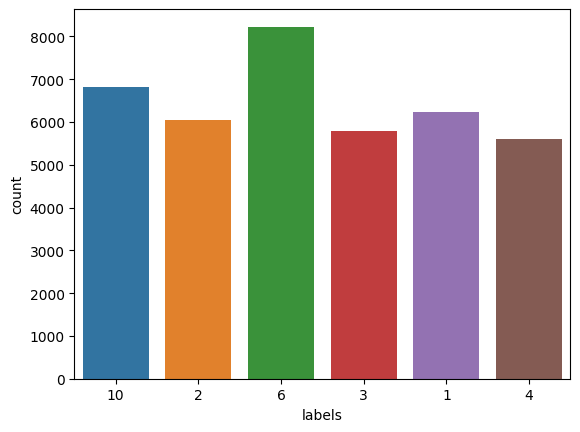

In [7]:
sns.countplot(x = df['labels'])

### Splitting the data

I have split the data in roughly a 60%, 20%, 20% split. Train set being 60% and test and validation sets being 20% each

In [8]:
x_train = df.iloc[0:24000,]
x_val = df.iloc[24001:31800,]
x_test = df.iloc[31801:,]

### Creating the dataset

In [9]:
train_ds = ImageDataGenerator(rescale = 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                              shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode="nearest")

train_ds = train_ds.flow_from_dataframe(dataframe=x_train, x_col='images', y_col="labels", target_size=(24, 24),
                                        batch_size = 32, class_mode = "categorical", color_mode = 'grayscale')

val_ds = ImageDataGenerator(rescale = 1./255)
val_ds = val_ds.flow_from_dataframe(dataframe=x_val, x_col="images", y_col="labels", target_size=(24, 24),
                                    batch_size = 32, class_mode = "categorical", color_mode = 'grayscale')

test_ds = ImageDataGenerator(rescale = 1./255)
test_ds = test_ds.flow_from_dataframe(dataframe=x_test, x_col = "images", y_col = "labels", target_size = (24, 24),
                                          class_mode = "categorical",color_mode = 'grayscale', batch_size = 32)

Found 24000 validated image filenames belonging to 6 classes.
Found 7799 validated image filenames belonging to 6 classes.
Found 6930 validated image filenames belonging to 6 classes.


### Creating the model

In [10]:
def modelfn(input_shape = (24,24)):
    x_input = Input(input_shape)
    x = x_input
    x = Conv2D(64, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = Activation('relu')(x)
    x = Conv2D(32, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = Activation('relu')(x)
    x = Conv2D(16, kernel_size = (3,3), strides = (1,1), padding = 'same')(x)
    x = Activation('relu')(x)
    x = MaxPool2D((2,2))(x)
    x = Flatten()(x)
    x = Dense(16)(x)
    x = Activation('relu')(x)
    x = Dense(8)(x)
    x = Activation('relu')(x)
    x = Dense(6)(x)
    x = Activation('softmax')(x)
    
    model = Model(inputs = x_input, outputs = x, name = 'modelfn')
    return model

In [11]:
lossfn = CategoricalCrossentropy()
optimizerfn = Adam(0.0001)

In [12]:
model = modelfn(input_shape = (24,24,1))

In [13]:
model.compile(optimizer = optimizerfn, loss = lossfn, metrics = ['accuracy'])

### Model summary

In [14]:
model.summary()

Model: "modelfn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 24, 24, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 64)        640       
                                                                 
 activation (Activation)     (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 activation_2 (Activation)   (None, 24, 24, 16)        0   

### Training the model

In [15]:
history = model.fit(train_ds, epochs = 25, validation_data=val_ds)

Epoch 1/25
750/750 [==============================] - 90s 119ms/step - loss: 1.4261 - accuracy: 0.3831 - val_loss: 0.7862 - val_accuracy: 0.6633
Epoch 2/25
750/750 [==============================] - 53s 71ms/step - loss: 0.7529 - accuracy: 0.7191 - val_loss: 0.3747 - val_accuracy: 0.9119
Epoch 3/25
750/750 [==============================] - 53s 70ms/step - loss: 0.5522 - accuracy: 0.8195 - val_loss: 0.4064 - val_accuracy: 0.8513
Epoch 4/25
750/750 [==============================] - 54s 72ms/step - loss: 0.4587 - accuracy: 0.8492 - val_loss: 0.2512 - val_accuracy: 0.9308
Epoch 5/25
750/750 [==============================] - 55s 73ms/step - loss: 0.4056 - accuracy: 0.8657 - val_loss: 0.2561 - val_accuracy: 0.9272
Epoch 6/25
750/750 [==============================] - 56s 74ms/step - loss: 0.3725 - accuracy: 0.8734 - val_loss: 0.2528 - val_accuracy: 0.9219
Epoch 7/25
750/750 [==============================] - 55s 74ms/step - loss: 0.3501 - accuracy: 0.8835 - val_loss: 0.2002 - val_accuracy

### Visualising loss and accuracy

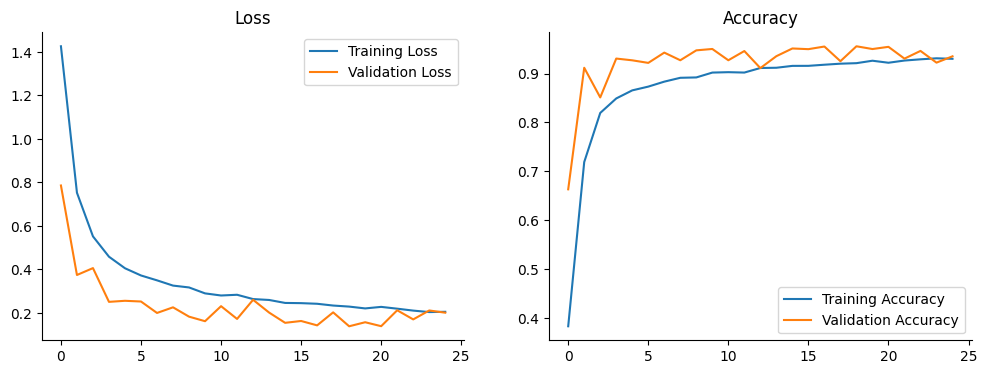

In [16]:
fig, axes = plt.subplots(1, 2, figsize = (12, 4))

sns.lineplot(x = range(len(history.history["loss"])), y = history.history["loss"], ax = axes[0], label = "Training Loss")
sns.lineplot(x = range(len(history.history["loss"])), y = history.history["val_loss"], ax = axes[0], label = "Validation Loss")

sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["accuracy"], ax = axes[1], label = "Training Accuracy")
sns.lineplot(x = range(len(history.history["accuracy"])), y = history.history["val_accuracy"], ax = axes[1], label = "Validation Accuracy")
axes[0].set_title("Loss"); axes[1].set_title("Accuracy")

sns.despine()
plt.show()

### Testing the model

The model achieved an accuracy of 93% in the test set

In [17]:
test_loss, test_acc = model.evaluate(test_ds, steps = 9)
print("Test accuracy = ", round(test_acc, 2))

9/9 [==============================] - 0s 43ms/step - loss: 0.2005 - accuracy: 0.9340
Test accuracy =  0.93


### Saving the model

In [18]:
model.save('tally_marks_detection.h5')